# What is the purpose of the project ?
+ Predict whether a patient will live or die based on the parameters using ML

# Workflow
+ Data Prepearation
+ EDA
+ Feature Selection
+ Model Building
+ Serialize Our Model (Serialization/ save our model)
+ Interpret and Evaluate Our Model
+ Production with Streamlit 

### Data Preparation

In [1]:
# Loading our EDA packages
import pandas as pd
import numpy as np

In [2]:
# Loading data viz packages
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# To avoid the warnings so that our notebook looks clean
import warnings
warnings.filterwarnings('ignore')

# (This won't hide the errors.)

In [4]:
# Load our dataset
df = pd.read_csv("D:/Softwares/DS/Project/Hepatitis/data.csv")

In [5]:
# Preview the first 5 rows
df.head()

# (Since we don't have columns names(column header) we will work on it.)

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.2,85,18,4,?,1.3
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1,?,200,4,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4,75,1


In [6]:
col_names = ["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"]

In [7]:
# Now once again loading our dataset and passing column names
df = pd.read_csv("D:\Softwares\DS\Project\Hepatitis\data.csv", names = col_names)

In [8]:
# Again previewing our first 5 rows to check whether we have got our column names or not
df.head()

# (As we can see we have got our column names but they are not in a same format, some are in uppercase, lowercase while
#  some have space between their name. So getting them all in the same format )

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1,85,18,4,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1,?,200,4,?,1


In [9]:
# Cleaning our column names
df.columns

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [10]:
# Converting all to lower case and filling the space between some column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [11]:
df.head()

# (All the column names are formated systematically)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1,85,18,4,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1,?,200,4,?,1


In [12]:
# Replacing ? with 0
df = df.replace('?', 0)
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1,85,18,4,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1,0,200,4,0,1


In [13]:
# Previewing column data types
df.dtypes

# (Now replacing all the object type with numerical)

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [14]:
# How many columns with object
sum(df.dtypes == 'object')

15

In [15]:
# Finding out columns with only object as a datatype
df.columns[df.dtypes == 'object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [16]:
# Doing Casting - Converting one datatype to another 
# Since we need to convert object datatype into int

# df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
#        'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
#                            'alk_phosphate', 'sgot', 'albumin', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
#                                                                                 'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
#                                                                                 'alk_phosphate', 'sgot', 'albumin', 'protime']].astype(int)

# (It gives error cause some of the values are in float so we cant convert them all)
# (Column like bilirubin and albumin are in object but they are also float so we need to take them off)

In [17]:
# Running the above l.o.c again to cast columns except bilirubin and albumin

df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 
                           'alk_phosphate', 'sgot', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
                                                                               'spleen_palpable', 'spiders', 'ascites', 'varices', 
                                                                               'alk_phosphate', 'sgot', 'protime']].astype(int)
df.dtypes

# (Now converted all the object dataypes into int except bilirubin and albumin)

class               int64
age                 int64
sex                 int64
steroid             int32
antivirals          int64
fatigue             int32
malaise             int32
anorexia            int32
liver_big           int32
liver_firm          int32
spleen_palpable     int32
spiders             int32
ascites             int32
varices             int32
bilirubin          object
alk_phosphate       int32
sgot                int32
albumin            object
protime             int32
histology           int64
dtype: object

In [18]:
# Now converting bilirubin and albumin into float as they already have values in float
df[['bilirubin', 'albumin']] = df[['bilirubin', 'albumin']].astype(float)

df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int32
antivirals           int64
fatigue              int32
malaise              int32
anorexia             int32
liver_big            int32
liver_firm           int32
spleen_palpable      int32
spiders              int32
ascites              int32
varices              int32
bilirubin          float64
alk_phosphate        int32
sgot                 int32
albumin            float64
protime              int32
histology            int64
dtype: object

In [19]:
# Now since all the columns are converted to their respective dtype, 
# we can replace all the '0' with either mean/median/mode of those columns

df['steroid'].replace(0, 2 ,inplace=True) #replaced 0 value containing in steroid with its mode
df['fatigue'].replace(0, 1 ,inplace=True) #replaced 0 value containing in fatigue with its mode
df['spiders'].replace(0, 2 ,inplace=True) #replaced 0 value containing in spiders with its mode
df['ascites'].replace(0, 2 ,inplace=True) #replaced 0 value containing in ascites with its mode
df['varices'].replace(0, 2 ,inplace=True) #replaced 0 value containing in varices with its mode
df['bilirubin'].replace(0, df['bilirubin'].median(),inplace=True) #replaced 0 value containing in bilirubin with its median
df['alk_phosphate'].replace(0, df['alk_phosphate'].mean(),inplace=True) #replaced 0 value containing in alk_phosphate with its mean
df['sgot'].replace(0, df['sgot'].median(),inplace=True) #replaced 0 value containing in sgot with its median
df['albumin'].replace(0, df['albumin'].median(),inplace=True) #replaced 0 value containing in albumin with its median
df['protime'].replace(0, df['protime'].mean(),inplace=True) #replaced 0 value containing in protime with its mean since before replacing the graph was not skewed

df['malaise'].replace(0, 2 ,inplace=True) #replaced 0 value containing in malaise with its mode
df['anorexia'].replace(0, 2 ,inplace=True) #replaced 0 value containing in anorexia with its mode
df['liver_big'].replace(0, 2 ,inplace=True) #replaced 0 value containing in liver_big with its mode
df['liver_firm'].replace(0, 2 ,inplace=True) #replaced 0 value containing in liver_firm with its mode
df['spleen_palpable'].replace(0, 2 ,inplace=True) #replaced 0 value containing in spleen_palpable with its mode


In [20]:
# Checking for the column count with 0 values in it

for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  class  is :  0
Count of zeros in column  age  is :  0
Count of zeros in column  sex  is :  0
Count of zeros in column  steroid  is :  0
Count of zeros in column  antivirals  is :  0
Count of zeros in column  fatigue  is :  0
Count of zeros in column  malaise  is :  0
Count of zeros in column  anorexia  is :  0
Count of zeros in column  liver_big  is :  0
Count of zeros in column  liver_firm  is :  0
Count of zeros in column  spleen_palpable  is :  0
Count of zeros in column  spiders  is :  0
Count of zeros in column  ascites  is :  0
Count of zeros in column  varices  is :  0
Count of zeros in column  bilirubin  is :  0
Count of zeros in column  alk_phosphate  is :  0
Count of zeros in column  sgot  is :  0
Count of zeros in column  albumin  is :  0
Count of zeros in column  protime  is :  0
Count of zeros in column  histology  is :  0


In [21]:
#df['steroid'].mode()
#df['bilirubin'].median() #to check the median/mode/mean of a certain column

In [22]:
#(df['spleen_palpable'] == 0).sum() # to check after imputing whether there are still 0's or not 

In [23]:
#sns.distplot(df.spleen_palpable)

In [24]:
#sns.boxplot(df.bilirubin)

In [25]:
df.info() # will again convert object to float 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            155 non-null    int64  
 1   age              155 non-null    int64  
 2   sex              155 non-null    int64  
 3   steroid          155 non-null    int32  
 4   antivirals       155 non-null    int64  
 5   fatigue          155 non-null    int32  
 6   malaise          155 non-null    int32  
 7   anorexia         155 non-null    int32  
 8   liver_big        155 non-null    int32  
 9   liver_firm       155 non-null    int32  
 10  spleen_palpable  155 non-null    int32  
 11  spiders          155 non-null    int32  
 12  ascites          155 non-null    int32  
 13  varices          155 non-null    int32  
 14  bilirubin        155 non-null    float64
 15  alk_phosphate    155 non-null    float64
 16  sgot             155 non-null    int32  
 17  albumin         

In [26]:
# Now converting bilirubin and albumin into float as they already have values in float
df[['bilirubin', 'albumin']] = df[['bilirubin', 'albumin']].astype(float)

df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int32
antivirals           int64
fatigue              int32
malaise              int32
anorexia             int32
liver_big            int32
liver_firm           int32
spleen_palpable      int32
spiders              int32
ascites              int32
varices              int32
bilirubin          float64
alk_phosphate      float64
sgot                 int32
albumin            float64
protime            float64
histology            int64
dtype: object

In [27]:
df.to_csv("D:\Softwares\DS\Project\Hepatitis\Original data\clean_data.csv")

#### Narrative - 
+        Most of the data were in objects so converted them into int
+        Two of them were already in float so kept them as float

In [28]:
# Count of each rows
df.count()

# (Every column has 155 rows)

class              155
age                155
sex                155
steroid            155
antivirals         155
fatigue            155
malaise            155
anorexia           155
liver_big          155
liver_firm         155
spleen_palpable    155
spiders            155
ascites            155
varices            155
bilirubin          155
alk_phosphate      155
sgot               155
albumin            155
protime            155
histology          155
dtype: int64

In [29]:
# Shape of our dataset
df.shape

# ( Rows - 155 ; Columns - 20)

(155, 20)

In [30]:
# Checking for missing values

df.isnull().sum()

# (There are no missing values)

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

### EDA
+ Descriptive analytics

In [31]:
# Checking for mean, minimum, maximum etc for all columns

df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.509677,1.845161,1.348387,1.606452,1.793548,1.838710,1.612903,1.806452,1.670968,1.870968,1.883871,1.410968,101.638460,85.096774,3.825806,50.521915,1.451613
std,0.406070,12.565878,0.305240,0.501527,0.362923,0.478004,0.490120,0.406070,0.368991,0.488665,0.396360,0.471385,0.336322,0.321418,1.191178,47.041718,88.615306,0.617267,21.382234,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,21.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.800000,78.000000,32.500000,3.500000,35.116129,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,85.619355,55.000000,3.900000,35.116129,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [32]:
# Checking value counts of our target variable 

df['class'].value_counts()

# (Die - 1 ; Live - 2)

2    123
1     32
Name: class, dtype: int64

<AxesSubplot:>

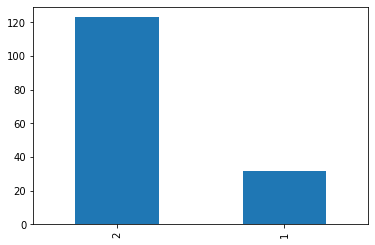

In [33]:
# Plot of count

df['class'].value_counts().plot(kind = 'bar')

In [34]:
# Identiying unique values for sex column

df['sex'].unique()

# (Male - 1 ; Female - 2)

array([2, 1], dtype=int64)

In [35]:
# Checking value counts for male and female

df['sex'].value_counts()

# (Total males in our dataset - 139 ; Total females in our dataset - 16)

1    139
2     16
Name: sex, dtype: int64

<AxesSubplot:>

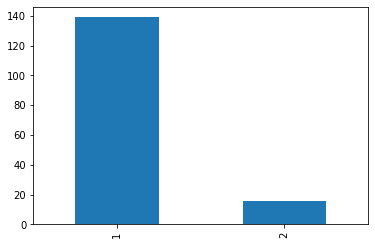

In [36]:
df['sex'].value_counts().plot(kind = 'bar')

### Narative - 
+ There are more males than females in our dataset

#### Frequency distribution table using Age range

In [37]:
print('Maximum Age :',df['age'].max())
print('Minimum Age :',df['age'].min())

Maximum Age : 78
Minimum Age : 7


In [38]:
labels = ['Less than 10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70 and more']
bins = [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['age'], bins = bins, labels = labels)).size()

In [39]:
print('Frequency Distribution Table using Age range')
print('---------------------------------------------')
#print(freq_df)
freq_df = freq_df.reset_index(name='count')
print(freq_df)


Frequency Distribution Table using Age range
---------------------------------------------
            age  count
0  Less than 10      1
1         10-20      3
2         20-30     29
3         30-40     50
4         40-50     35
5         50-60     24
6         60-70     11
7   70 and more      2


<AxesSubplot:>

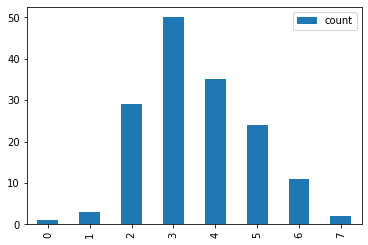

In [40]:
freq_df.plot(kind='bar')

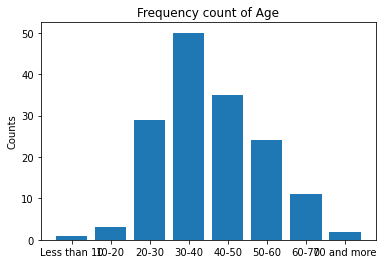

In [41]:
# Plot a frequency table
plt.bar(freq_df['age'], freq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency count of Age')
plt.show()

#### Narative - 
+ Highest prevalence of Hepatitis is from age 30-40 followed by 40-50
+ The least is individual under 10 and elderly above 70

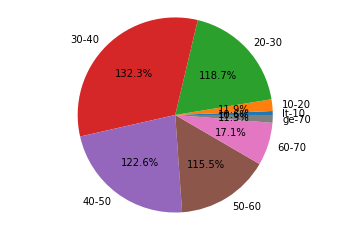

In [42]:
# Using pie chart
labels = ['lt-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', 'ge-70']
figl,axl = plt.subplots()
axl.pie(freq_df['count'], labels = labels, autopct = '1%.1f%%')
axl.axis('equal')
plt.show()

#### Checking for outliers
+ Univariate Analysis
+ Multivariate Analysis
##### Methods
+ Boxplot (Uni)
+ Scatter plot (Multi)
+ IQR - Interquartile Range

<AxesSubplot:xlabel='age'>

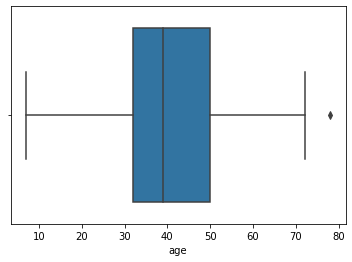

In [43]:
# Using Box Plot for Univariate Outlier Detection 
# In boxplot only one column can be passed to check the outlier

sns.boxplot(df['age'])

# (Here we can see 1 outlier which is at 78, lets check for it)

In [44]:
df[df['age'] == 78]

# (As here we have got only 1 value at 78 which may be anomaly or outlier)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.0,32,4.0,35.116129,1


<AxesSubplot:xlabel='alk_phosphate'>

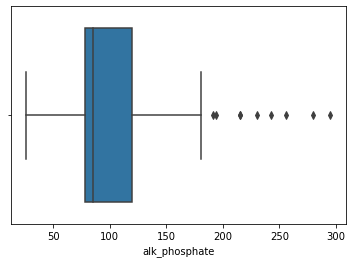

In [45]:
sns.boxplot(df['alk_phosphate'])

# (There can be seen some anomalies. 5 anomalies)

<AxesSubplot:xlabel='steroid'>

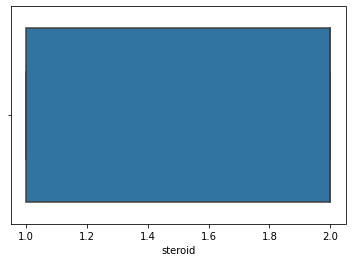

In [46]:
# Using boxplot for outlier detection 
sns.boxplot(df['steroid'])

# (As here it can be seen that we dont have any outlier in steroid column)

<AxesSubplot:xlabel='age', ylabel='albumin'>

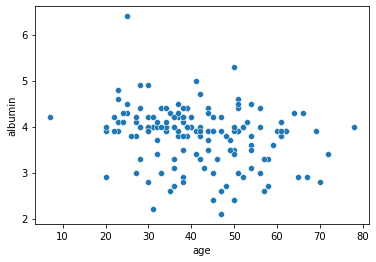

In [47]:
# Scatterplot (2 columns can be passed here)
sns.scatterplot(df['age'], df['albumin'])

<AxesSubplot:xlabel='albumin', ylabel='age'>

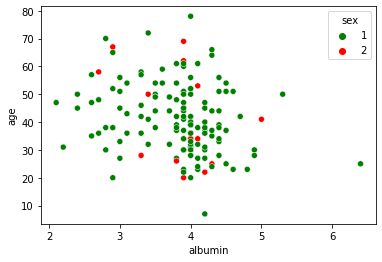

In [48]:
# Scatter plot (Making it more presentable)
sns.scatterplot(x = df['albumin'], y=df['age'], hue = df['sex'], palette = ['green', 'red'], data = df)

# (Here we can see most of the data points are male and albumin majorly ranges from 2-5 and we have got 1 outlier which is beyond 6)

In [49]:
# Using Interquarrtile Range(IQR)
# H-spread / Mid spread
# Measure of the statistical dispersion/spread of the data
# IQR = Quantile 3(75)-Quantile 1(25)
# This can be used when we have to see for the entire dataset unlike boxplot and scatterplot

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

IQR = q3 - q1
print(IQR)

# (Here we can see there is something fishy about age, alk_phosphate, sgot, protime)

class               0.000000
age                18.000000
sex                 0.000000
steroid             1.000000
antivirals          0.000000
fatigue             1.000000
malaise             1.000000
anorexia            0.000000
liver_big           0.000000
liver_firm          1.000000
spleen_palpable     0.000000
spiders             1.000000
ascites             0.000000
varices             0.000000
bilirubin           0.700000
alk_phosphate      41.500000
sgot               66.500000
albumin             0.700000
protime            29.883871
histology           1.000000
dtype: float64


In [50]:
# Get the actual datapoint that is an outlier
(df < (q1 - 1.5 * IQR)) | (df > (q3 - 1.5 * IQR))  # we can set the parameters according to us

# This will give us output in true and false
# (Here we can see whether or not our dataset has an outlier in terms of true and false )
# (The data points with true value are the outliers)
# (Solution - Remove, Change or Ignore)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,True,True,True,False,True,True,False,True,True,False,True,False,False,True,True,True,True,True,True
1,False,True,False,True,False,True,True,False,True,True,False,True,False,False,True,True,True,True,True,True
2,False,True,False,True,False,True,True,False,False,True,False,True,False,False,True,True,True,True,True,True
3,False,True,False,True,True,True,True,False,False,True,False,True,False,False,True,False,True,True,True,True
4,False,True,False,True,False,True,True,False,False,True,False,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,True,False,True,False,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True
151,False,True,False,True,False,True,True,False,False,True,False,True,False,False,True,True,True,True,True,True
152,False,True,False,True,False,True,True,False,True,True,False,True,False,False,True,True,True,True,True,True
153,False,True,True,True,False,True,True,False,False,True,True,True,False,True,True,True,True,True,True,True


In [51]:
# Removing outliers
df_remove_outlier = df[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis = 1)]

# '~' indicates we are trying to get the values opposite of (df < (q1 - 1.5 * IQR)) | (df > (q3 - 1.5 * IQR)
# Like we are removing all the true values and keeping all the false (false : no outlier)

In [52]:
df_remove_outlier

# This is the data with not having any outlier

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95.000000,28,4.0,75.000000,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85.619355,55,3.9,35.116129,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,85.619355,48,4.4,35.116129,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85.619355,120,3.9,35.116129,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57.000000,144,4.9,78.000000,1
16,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.2,102.000000,53,4.3,35.116129,1
17,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62.000000,166,4.0,63.000000,1
18,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.7,53.000000,42,4.1,85.000000,2
22,2,31,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85.000000,20,4.0,100.000000,1
23,2,42,1,2,2,2,2,2,2,2,2,2,2,2,0.9,60.000000,63,4.7,47.000000,1


In [53]:
# Comparing shape of original dataset with removed outlier dataset

print(df.shape)
print(df_remove_outlier.shape)

# (As we can see that we have left with so much less data after removing outliers)
# (It can aso be said that we have lot of outliers within our dataset based on IQR method)
# (Removing outlier in this case is not a good option so either we can change it or ignore it)
# (I have chosen to keep them as it is. IGNORE it)

(155, 20)
(46, 20)


### Feature Selection and Importance
+ Use of sklearn
+ SelectKbest - It will select K(3/4/5/6/7 etc) best features which will have strong relationship with our output/target   variable
+ Recursive Feature Elimination - It's also helpful as it will select the best features and eleminate the features that are not important and will keep only those features which will have strong relationship, strong correlation and strong influence on our data

In [74]:
# Loading required packages

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [75]:
df.head()

# ('Class' is our label and remaining all are our features)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.000000,18,4.0,35.116129,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.000000,42,3.5,35.116129,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.000000,32,4.0,35.116129,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.000000,52,4.0,80.000000,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85.619355,200,4.0,35.116129,1


In [76]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [77]:
x_features = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]

y_labels = df['class']

#### Now looking for the best features which will help us in good prediction
#### - Using SelectKBest

In [78]:

skb = SelectKBest(score_func = chi2, k = 10) #here, chi2 is our function and K is the no. of features we want
best_feature_fit = skb.fit(x_features, y_labels)

In [79]:
# Checking for the best score
# Highest score shows the best fit for our prediction

print('Score :\n', best_feature_fit.scores_)

Score :
 [2.84748192e+01 3.89483193e-01 4.84486832e-01 1.86341606e-01
 2.44428074e+00 2.65469296e+00 2.52855033e-01 1.00043681e-01
 9.17174797e-03 7.34973868e-01 3.10104922e+00 2.05083053e+00
 1.10904698e+00 3.06691142e+01 5.29059013e+01 6.74947766e+01
 3.27078492e+00 9.12096217e+01 3.01854675e+00]


In [80]:
# Mapping this scores to their respective feature name

feature_scores = pd.DataFrame(best_feature_fit.scores_, columns = ['Feature_Scores'])
print(feature_scores)

    Feature_Scores
0        28.474819
1         0.389483
2         0.484487
3         0.186342
4         2.444281
5         2.654693
6         0.252855
7         0.100044
8         0.009172
9         0.734974
10        3.101049
11        2.050831
12        1.109047
13       30.669114
14       52.905901
15       67.494777
16        3.270785
17       91.209622
18        3.018547


In [81]:
feature_column_name = pd.DataFrame(x_features.columns, columns = ['Feature_Name'])
feature_column_name

,Feature_Name
0,age
1,sex
2,steroid
3,antivirals
4,fatigue
5,malaise
6,anorexia
7,liver_big
8,liver_firm
9,spleen_palpable


In [82]:
best_feature_df_skb = pd.concat([feature_scores, feature_column_name], axis = 1)
best_feature_df_skb

,Feature_Scores,Feature_Name
0,28.474819,age
1,0.389483,sex
2,0.484487,steroid
3,0.186342,antivirals
4,2.444281,fatigue
5,2.654693,malaise
6,0.252855,anorexia
7,0.100044,liver_big
8,0.009172,liver_firm
9,0.734974,spleen_palpable


In [83]:
# Get the best
# Higher the score, more important the feature

best_feature_df_skb.nlargest(12, 'Feature_Scores')

# (Based on the feature score we have got the top 12 features)

,Feature_Scores,Feature_Name
17,91.209622,protime
15,67.494777,sgot
14,52.905901,alk_phosphate
13,30.669114,bilirubin
0,28.474819,age
16,3.270785,albumin
10,3.101049,spiders
18,3.018547,histology
5,2.654693,malaise
4,2.444281,fatigue


#### - Using Recursive Feature Elimination 
        This will let us know which of the features we have to eliminate and which of them needs to be kept/allowed.

In [84]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [85]:
logit = LogisticRegression()

In [86]:
rfe = RFE(logit,n_features_to_select=10)  #10 indicates the no. of ranks

In [87]:
rfe_fit = rfe.fit(x_features, y_labels)

In [88]:
# Column selection
selected_features = pd.DataFrame(rfe_fit.support_, columns = ['Selected_Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_, columns = ['Ranking_Features'])

In [89]:
best_feature_df_rfe = pd.concat([feature_column_name,selected_features,ranking_features], axis = 1)
best_feature_df_rfe

# True means we need to eliminate those.
# Here we can also eliminate the features with lowest ranking.

# (But as we can see albumin is set as true and has the lowest ranking so a/c tp RFE we should elininate it but I think we 
#  should not cause it can play a major role for the correct predictions. And thats where domain expertise/knowledge comes in.)

,Feature_Name,Selected_Features,Ranking_Features
0,age,False,7
1,sex,True,1
2,steroid,True,1
3,antivirals,False,6
4,fatigue,False,2
5,malaise,True,1
6,anorexia,True,1
7,liver_big,True,1
8,liver_firm,False,3
9,spleen_palpable,True,1


#### - Using tree classifier to check which of these features are important (Feature Selection using ExtraTreeClassifier)


In [90]:

from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier()
et_clf_fit = et_clf.fit(x_features, y_labels)

In [91]:
# Printing important features

print(et_clf.feature_importances_)

# Higher the no. more important the feature is.

[0.05968307 0.02447058 0.02810322 0.00960304 0.02131761 0.05611948
 0.02850579 0.02686056 0.04730931 0.03614019 0.07871236 0.10222584
 0.05787886 0.08811118 0.07798819 0.05632978 0.08801971 0.06405796
 0.04856327]


In [92]:
best_features_df_etclf = pd.Series(et_clf.feature_importances_, index = x_features.columns)
best_features_df_etclf

age                0.059683
sex                0.024471
steroid            0.028103
antivirals         0.009603
fatigue            0.021318
malaise            0.056119
anorexia           0.028506
liver_big          0.026861
liver_firm         0.047309
spleen_palpable    0.036140
spiders            0.078712
ascites            0.102226
varices            0.057879
bilirubin          0.088111
alk_phosphate      0.077988
sgot               0.056330
albumin            0.088020
protime            0.064058
histology          0.048563
dtype: float64

<AxesSubplot:>

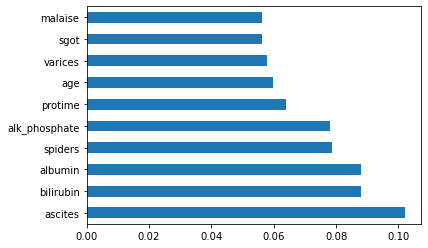

In [93]:
# Plotting Barh plot to see the top 10 features 

best_features_df_etclf.nlargest(10).plot(kind = 'barh')

#### Narative - 
+ All the methods gave us almost the same features to use.

In [94]:
# Now checking for the correlation in our dataset
df.corr()

# (This can also be done using plot)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.219647,0.173051,0.137413,-0.130196,0.306049,0.339530,0.133638,-0.093665,0.020057,0.234261,0.389137,0.469334,0.362385,-0.445012,-0.125614,-0.068916,0.461800,0.255827,-0.337856
age,-0.219647,1.000000,0.008126,-0.090466,-0.013100,-0.278701,-0.117876,0.088317,-0.089629,-0.092001,-0.061277,-0.156545,-0.055314,-0.039229,0.115205,0.017665,0.080171,-0.242444,-0.101818,0.170780
sex,0.173051,0.008126,1.000000,-0.048985,-0.089249,-0.070059,-0.030523,0.015886,-0.081830,-0.078642,-0.048478,-0.033192,0.130587,0.056792,-0.051354,0.098940,-0.014536,0.006448,0.040025,-0.137450
steroid,0.137413,-0.090466,-0.048985,1.000000,0.043961,0.175451,0.240139,0.073644,0.201478,0.068376,0.074816,0.027290,-0.031046,-0.073548,-0.043113,-0.050238,-0.039398,0.211041,0.096107,-0.095367
antivirals,-0.130196,-0.013100,-0.089249,0.043961,1.000000,-0.061339,-0.016251,-0.042072,0.054746,0.099213,-0.164548,-0.147909,-0.164747,-0.155148,0.181197,0.168762,0.103846,-0.161762,-0.204765,0.209242
fatigue,0.306049,-0.278701,-0.070059,0.175451,-0.061339,1.000000,0.589030,0.372957,0.099759,0.247505,0.186846,0.367948,0.281439,0.180511,-0.272476,-0.151800,-0.197637,0.310451,0.153644,-0.146579
malaise,0.339530,-0.117876,-0.030523,0.240139,-0.016251,0.589030,1.000000,0.600545,0.041697,0.091832,0.006470,0.307173,0.320228,0.161422,-0.300650,-0.194575,-0.205141,0.289206,0.130770,-0.144667
anorexia,0.133638,0.088317,0.015886,0.073644,-0.042072,0.372957,0.600545,1.000000,0.079685,0.052781,0.032536,0.287366,0.184053,0.163378,-0.298684,-0.124675,-0.233491,0.156106,0.085140,-0.081623
liver_big,-0.093665,-0.089629,-0.081830,0.201478,0.054746,0.099759,0.041697,0.079685,1.000000,0.479779,0.095959,0.215566,-0.116465,-0.049453,0.008483,-0.142259,0.046355,-0.055732,-0.026621,-0.060262
liver_firm,0.020057,-0.092001,-0.078642,0.068376,0.099213,0.247505,0.091832,0.052781,0.479779,1.000000,0.180607,0.345553,0.010196,0.208047,-0.045090,-0.354168,-0.099899,0.181873,-0.068987,-0.157118


<AxesSubplot:>

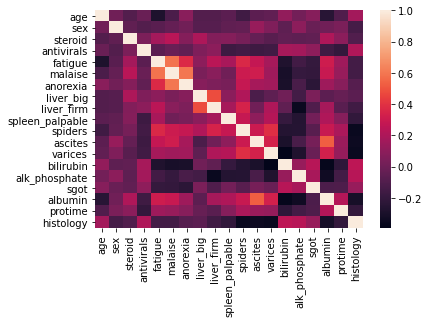

In [95]:
# Heatmap for correlation
# Using seaborn heatmap plot

sns.heatmap(x_features.corr())

# (As this is difficult to read so we will again plot using annotation method)

<AxesSubplot:>

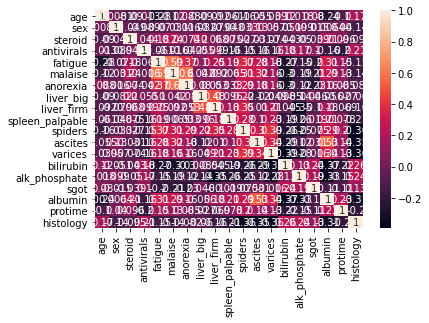

In [96]:
# Heatmap for correlation with annotation
sns.heatmap(x_features.corr(), annot = True)

# (Since this plot is very small so will increase its size to read it more)

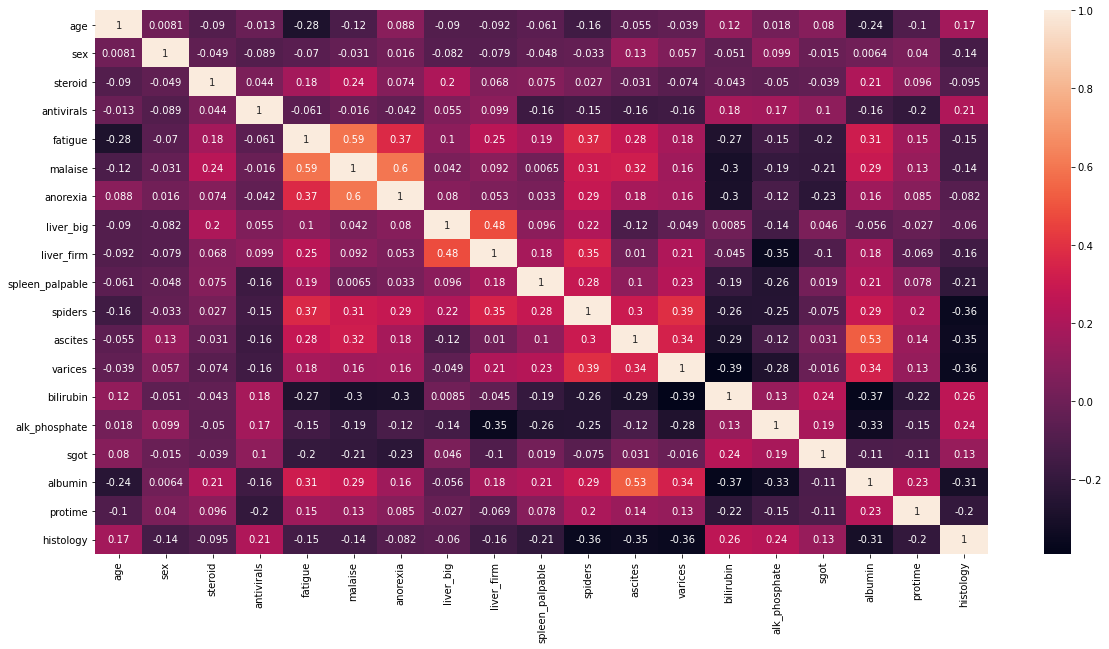

In [97]:
# Again plotting heatmap for correlation using annot
plt.figure(figsize=(20,10)) 
sns.heatmap(x_features.corr(), annot = True)
plt.show()

### Model Building
+ Selecting important features
+ Applying train/test/split
+ LogisticR
+ KNN
+ DecisionT

In [98]:
# ML packages

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

##### As I have already extracted the important features in the above feature selection method so from those 3 finally selecting SelectKBest to get the relevant features

In [99]:
# Getting the features from SKB method

best_feature_df_skb.nlargest(12, 'Feature_Scores')['Feature_Name'].unique()

# (Since we have age column in our shorlisted so its always a good practice to add sex column to it )

array(['protime', 'sgot', 'alk_phosphate', 'bilirubin', 'age', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices'],
      dtype=object)

In [100]:
# Intial features

x_features.columns

# (Now will compare Initial features with SKB features)

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')

In [101]:
# Now selecting the most relevant features to get the best from our model/prediction
# Here we are adding steroid and antivirals and removing malaise from the feature as malaise is considered as general

x_features_best = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue','spiders', 'ascites',
                   'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
                   'histology']]

labels = df['class']

# This are our final features which will be used further to create our model

In [102]:
# Train/Test split for the initial features

x_train, x_test, y_train, y_test = train_test_split(x_features, y_labels, test_size=0.3, random_state=42)

In [103]:
# Train/Test split for the BEST features

x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_features_best, y_labels, stratify=y_labels, test_size=0.3, random_state=42)

In [104]:
# Building model for initial features

LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [105]:
# Checking accuracy
# Method 1

LR.score(x_test, y_test)

0.8297872340425532

In [106]:
# Method 2

print('Predicted Values : \n', LR.predict(x_test)) #predicted values
print('--------------------------------------------------------------------------------------------------------------')
print('Actual Values : \n', list(y_test)) #actual values

# (Now compare the predicted values with actual value)

Predicted Values : 
 [2 1 2 2 1 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2]
--------------------------------------------------------------------------------------------------------------
Actual Values : 
 [2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2]


In [107]:
# Checking accuracy for method 2

accuracy_score(y_test, LR.predict(x_test)) 

# (These were 2 methods through which we got the accuracy score)

0.8297872340425532

In [108]:
# Building model for BEST features

logistic_model = LogisticRegression()
logistic_model.fit(x_train_b, y_train_b)

LogisticRegression()

In [109]:
# Checking accuracy for BEST features
# Method 1

logistic_model.score(x_test_b, y_test_b)

# (Since we have got almost the same accuracy for initial and best features so we are now going to use other algorithms)

0.8723404255319149

#### Using Alternative Algorthims

In [110]:
# Using Decision Tree 

DT_model = DecisionTreeClassifier()
DT_model.fit(x_train_b, y_train_b)

DecisionTreeClassifier()

In [111]:
# DT Model score
DT_model.score(x_test_b, y_test_b)

# (Since it can be seen that in our case LR performed better than DT)

0.7021276595744681

In [112]:
# Using Random Forest

RF_model = RandomForestClassifier(n_estimators=3, criterion='entropy', min_samples_leaf=2, random_state=2)
RF_model.fit(x_test_b, y_test_b)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2, n_estimators=3,
                       random_state=2)

In [113]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RF_model, x_features_best, y_labels, cv=5)
scores

array([0.77419355, 0.77419355, 0.83870968, 0.80645161, 0.70967742])

In [114]:
scores.mean()

0.7806451612903226

In [115]:
# RF model score

RF_model.score(x_test_b, y_test_b)

0.851063829787234

In [116]:
RF_model.score(x_train_b, y_train_b)

0.8425925925925926

In [117]:
# Using KNN

from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=12, p=2)
KNN_model.fit(x_train_b, y_train_b)

KNeighborsClassifier(n_neighbors=12)

In [118]:
# KNN Model Score
KNN_model.score(x_test_b, y_test_b)


0.7872340425531915

##### Training below models using initial features

In [119]:

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
DT.score(x_test, y_test)


0.723404255319149

In [120]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=12, p=2)
KNN.fit(x_train, y_train)
KNN.score(x_test, y_test)


0.8085106382978723

In [121]:
RF = RandomForestClassifier(n_estimators=5, criterion='entropy', min_samples_leaf=2, random_state=2)
RF.fit(x_test, y_test)
RF.score(x_test, y_test)

0.9574468085106383

### Saving Our Model
#### Methods - 
+ Pickle
+ Joblib
+ Numpy/json/ray

In [295]:
# Using Joblib
# Saving Logistic Regression model on our best features

import joblib
model_file_LR = open("Logistic_Regression_Model.pkl", 'wb')
joblib.dump(logistic_model, model_file_LR)
model_file_LR.close()

In [296]:
# Saving Decision Tree Model on our best features

model_file_DT = open("Decision_Tree_Model.pkl", 'wb')
joblib.dump(DT_model, model_file_DT)
model_file_DT.close()

In [297]:
# Saving KNN model on our best features

model_file_knn = open("KNN_Model.pkl", 'wb')
joblib.dump(KNN_model, model_file_knn)
model_file_knn.close()

In [298]:
# Creating Decision Tree Plot
# Packages required -

from IPython.display import Image
from sklearn import tree
import pydotplus

In [124]:
feature_names = x_features_best.columns
target_names = ['Die', 'Live']

In [300]:
# Dot plot
dot_data = tree.export_graphviz(DT_model, out_file=None, feature_names=feature_names, class_names=target_names)

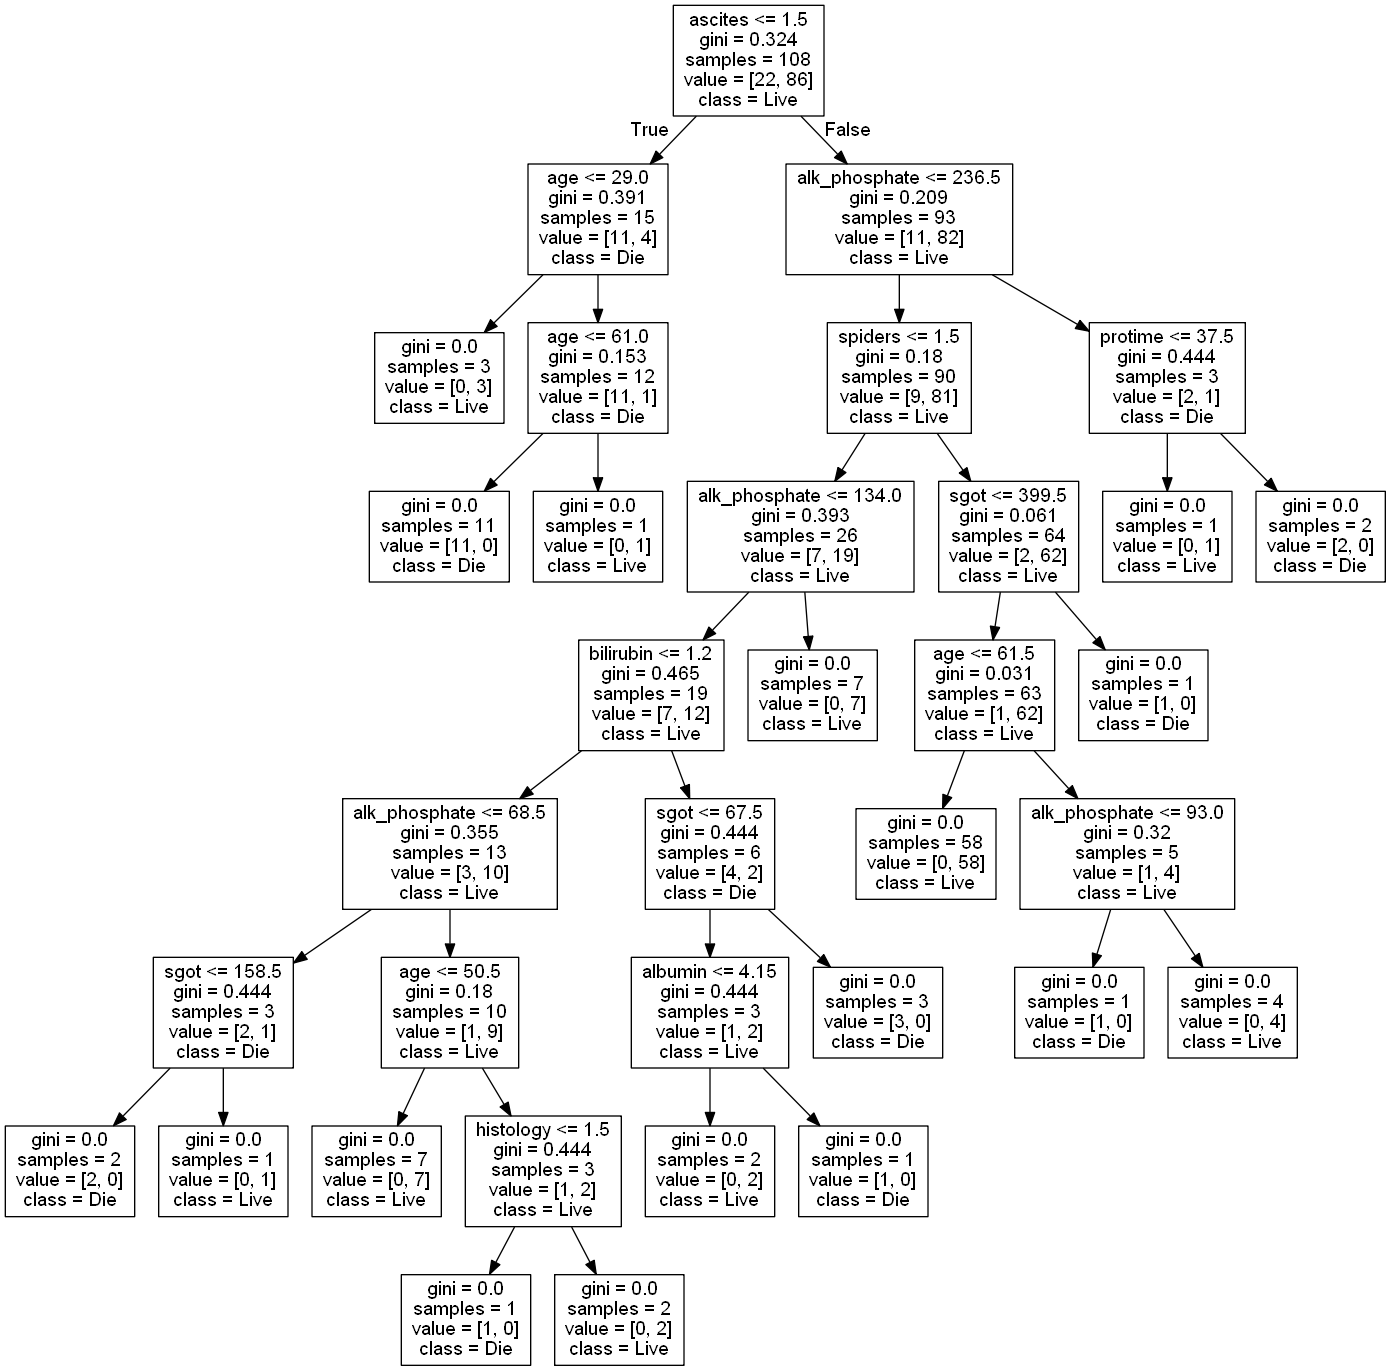

In [301]:
# Drawing a graph
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# This graph is so insightful as it tells us how our model works how its going to classify whether someone is alive or dead
# (It can be seen that the decision is made based on 'ascities' which is one of the important features which we got in the
#  feature importance step)
# (When the condition is true the patient is going to live and when false he/she is going to die.)

In [302]:
# Saving the image

graph.write_png("Decision_Tree_Plot.png")

True

### Interpreting and Evaluating our Model
#### Methods for interpreting our model
+ Eli5
+ Lime
+ SHAP
+ Skater

In [122]:
# Interpreting with Lime
import lime
import lime.lime_tabular

#### Creating Lime Explainer
+ LimeTabularExplainer = Tables
+ LimeTextExplainer = Text
+ LimeImageExplainer = Images

In [125]:
print(feature_names)

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')


In [126]:
target_names

['Die', 'Live']

In [127]:
# Creating Explainer

lime_explainer = lime.lime_tabular.LimeTabularExplainer(x_train_b.values,
                                                  feature_names=x_features_best, class_names=target_names,
                                                  discretize_continuous=True)

In [128]:
x_test_b.iloc[2]

age              39.000000
sex               1.000000
steroid           2.000000
antivirals        2.000000
fatigue           1.000000
spiders           2.000000
ascites           2.000000
varices           2.000000
bilirubin         0.700000
alk_phosphate    85.619355
sgot             48.000000
albumin           4.400000
protime          35.116129
histology         1.000000
Name: 8, dtype: float64

In [129]:
# Checking for the prediction

logistic_model.predict(np.array(x_test_b.iloc[5]).reshape(1,-1))

# The person is going to live a/c to 'x_test_b.iloc[5]' parameters.

array([2], dtype=int64)

In [130]:
# So now lets explain why is this person going to live
# Trying to explain with lime why this person is going to live.

exp = lime_explainer.explain_instance(x_test_b.iloc[5], logistic_model.predict_proba, num_features=14)
exp.show_in_notebook(show_table=True, show_all=False)

# Here all the orange's are contributing to the person who is going to live
# histology, spiders, fatigue, bilirubin, albumin, steroid, age influences or makes sure that the person is going to live.

In [310]:
# exp.as_list() # In case if we want to see the above result in list format.

#### Creating Eli5 Explainer
+ Eli5 can be used to know which of the features contribute the most to give us the particular prediction.
+ How each feature contributes to gives us the prediction.

In [131]:
import eli5
eli5.show_weights(logistic_model, top=10)

# top = 10 shows top 10 features
# (Since this has not given the name of the features so bringing them next)

In [132]:
# This will show us the feature names as well

#eli5.show_weights(logistic_model, feature_names=feature_names, target_names = target_names, top=10)

# Since our 'feature_names' datatype is pandas so it won't run.
# Again allocating the best feature names to 'feature_names'

In [133]:
# Allocated the list to feature names
feature_names = ['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology']


eli5.show_weights(logistic_model, feature_names=feature_names, target_names = target_names)
# here as we can see that the feature names have now appeared.

# Higher the weight of the feature more good the feature is.
# Here top 6 features are good sign for a person who is suffering from Hepatitis cause he will eventually be alive.
# The person having sex,....,varices will be alive.

Weight?,Feature
+1.174,sex
+0.890,steroid
+0.788,ascites
+0.642,spiders
+0.286,fatigue
+0.248,albumin
+0.124,varices
+0.012,protime
+0.000,sgot
-0.007,alk_phosphate


In [134]:
# Explaining our prediction in plot image like we did above with Lime

eli5.show_prediction(logistic_model, x_test_b.iloc[5], feature_names=feature_names, target_names = target_names)

# here a/c to eli5, 'spiders, albumin, fatigue,...,steroid' are the features which are contributing the most to keep
# the patient alive with the p=0.97 same as that of Lime

### Evaluating Our Model
#### Some methods- 
+ Confusion Matrix
+ Classification Report
+ Accuracy Score

In [321]:
from sklearn.metrics import confusion_matrix
y_pred = logistic_model.predict(x_test_b)

In [322]:
# Using Accuaracy score
accuracy_score(y_test_b, y_pred)

0.8723404255319149

In [323]:
# Using Confusion Matrix
# To understand which of these are true positive and true negtive.

confusion_matrix(y_test_b, y_pred)

# (It's not looking pretty good so plotting it next)

array([[ 6,  4],
       [ 2, 35]], dtype=int64)

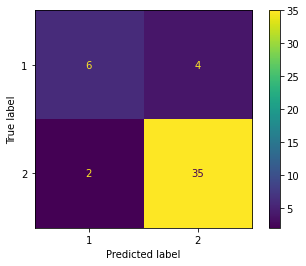

In [324]:
# Plotting confusion matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logistic_model, x_test_b, y_test_b)

# Here,  True Positive = 3
#        True Negative = 36
#        False Positive = 2 (Type I Error)
#        False Negative = 6 (Type II Error)

In [325]:
# Here we can also see for a particular value using below l.o.c

#tp, fn, fp, tn = confusion_matrix(y_test_b, y_pred).ravel()
#print(fp, fn)

In [326]:
# Using Classification Report
# This will help us to get the precision, recall, etc. 

from sklearn.metrics import classification_report 
print(classification_report(y_test_b, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Die       0.75      0.60      0.67        10
        Live       0.90      0.95      0.92        37

    accuracy                           0.87        47
   macro avg       0.82      0.77      0.79        47
weighted avg       0.87      0.87      0.87        47



##### This model is generated on imbalanced dataset. For more clear Model Building and Model Evaluation please refer HepatitisModelCheck.ipynb notebook.